___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME

This notebook will guide you through two increasingly significant applications in the realm of Generative AI: RAG (Retrieval Augmented Generation) chatbots and text summarization for big text.

Through two distinct projects, you will explore these technologies and enhance your skills. Detailed descriptions of the projects are provided below.

## Project 1: Building a Chatbot with a PDF Document (RAG)

In this project, you will develop a chatbot using a provided PDF document from web page. You will utilize the Langchain framework along with a large language model (LLM) such as GPT or Gemini. The chatbot will leverage the Retrieval Augmented Generation (RAG) technique to comprehend the document's content and respond to user queries effectively.

### **Project Steps:**

- **1.PDF Document Upload:** Upload the provided PDF document from web page (https://aclanthology.org/N19-1423.pdf) (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding).

- **2.Chunking:** Divide the uploaded PDF document into smaller segments (chunks). This facilitates more efficient information processing by the LLM.

- **3.ChromaDB Setup:**
  - Save ChromaDB to your Google Drive.

  - Retrieve ChromaDB from your Drive to begin using it in your project.

  - ChromaDB serves as a vector database to store embedding vectors generated from your document.

- **4.Embedding Vectors Creation:**
  - Convert the chunked document into embedding vectors. You can use either GPT or Gemini embedding models for this purpose.

  - If you choose the Gemini embedding model, set "task_type" to "retrieval_document" when converting the chunked document.

- **5.Chatbot Development:**
  - Utilize the **load_qa_chain** function from the Langchain library to build the chatbot.

  - This function will interpret user queries, retrieve relevant information from **ChromaDB**, and generate responses accordingly.



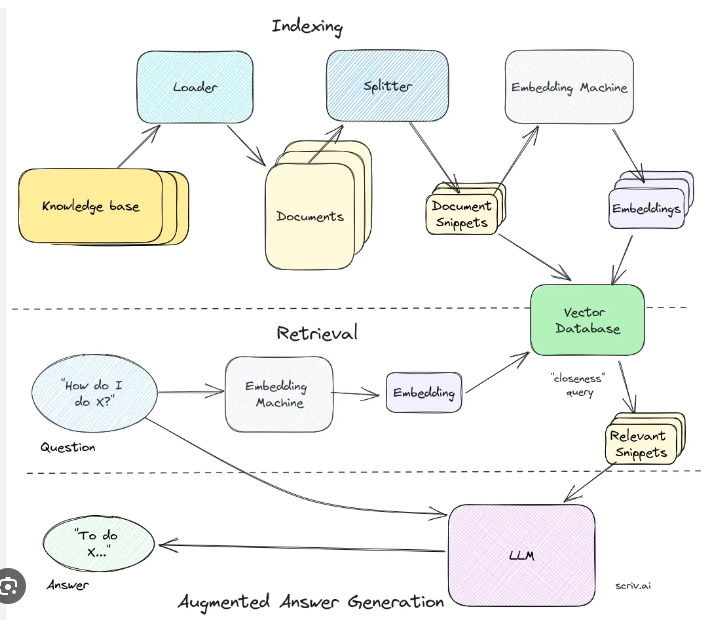

### Install Libraries

In [ ]:
!pip install -qU langchain-google-community

In [ ]:
!pip install -qU langchain-community

In [ ]:
!pip install langchain-google-genai


In [ ]:
!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 8.6 MB/s eta 0:00:00

In [ ]:
!pip install -qU pypdfium2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 701.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install chromadb

In [ ]:
import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA


In [ ]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 972.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.0 MB/s eta 0:00:00


### Access Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Entering Your OpenAI or Google Gemini API Key.

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY']=userdata.get('OPENAI_API_KEY')

### Loading PDF Document

In [ ]:
# create a pdf reader function
from langchain_community.document_loaders import PyPDFium2Loader

def read_doc(directory):
    file_loader=PyPDFium2Loader(directory)
    pdf_documents=file_loader.load() # PyPDFium2Loader reads page by page
    return pdf_documents

In [ ]:
pdf=read_doc('/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf')
len(pdf)

# The document consists of 16 pages

/usr/local/lib/python3.10/dist-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


16

In [ ]:
pdf[0]

Document(metadata={'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf', 'page': 0}, page_content='Proceedings of NAACL-HLT 2019, pages 4171–4186\r\nMinneapolis, Minnesota, June 2 - June 7, 2019. \rc 2019 Association for Computational Linguistics\r\n4171\r\nBERT: Pre-training of Deep Bidirectional Transformers for\r\nLanguage Understanding\r\nJacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova\r\nGoogle AI Language\r\n{jacobdevlin,mingweichang,kentonl,kristout}@google.com\r\nAbstract\r\nWe introduce a new language representa\x02tion model called BERT, which stands for\r\nBidirectional Encoder Representations from\r\nTransformers. Unlike recent language repre\x02sentation models (Peters et al., 2018a; Rad\x02ford et al., 2018), BERT is designed to pre\x02train deep bidirectional representations from\r\nunlabeled text by jointly conditioning on both\r\nleft and right context in all layers. As a re\x02sult, the pre-trained BERT model can be fine\x02tuned with just one additio

### Document Splitter

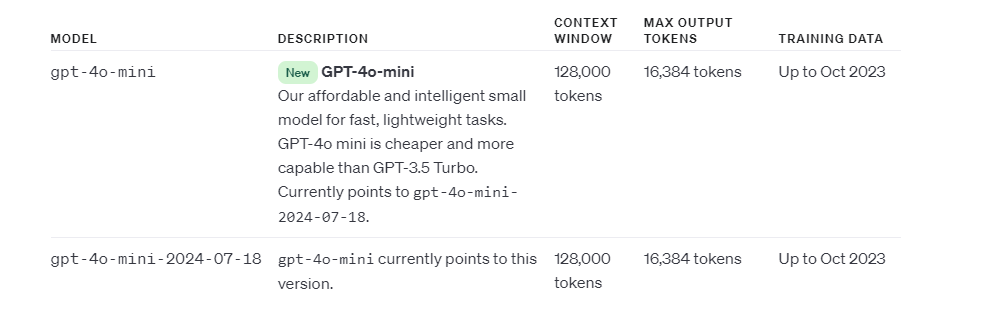

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter


def chunk_data(docs, chunk_size=1000, chunk_overlap=200):
    text_splitter=RecursiveCharacterTextSplitter(chunk_size=chunk_size,
                                                 chunk_overlap=chunk_overlap)
    pdf=text_splitter.split_documents(docs)
    return pdf

# This code splits documents into chunks using the RecursiveCharacterTextSplitter class from the langchain library.

# A function named chunk_data is defined, which takes a document or a collection of documents (docs) as input. It also takes two parameters:
# chunk_size and chunk_overlap. chunk_size specifies the maximum number of characters in each chunk, while chunk_overlap determines the amount of
# overlap between consecutive chunks.

# The function divides the documents into chunks based on these parameters using the RecursiveCharacterTextSplitter class. Consequently, each chunk
# contains chunk_size characters, with an overlap of chunk_overlap characters between consecutive chunks.

# As a result, the documents are segmented into chunks of specified sizes, and these chunks are returned.

# The chunk_overlap parameter is used to specify the sharing of characters between consecutive chunks. In other words, it ensures that the characters at
# the end of one chunk reappear at the beginning of the next chunk. This prevents the loss of information when the text is segmented or divided and
# helps preserve a certain context. Especially, overlap can be used to maintain important contextual relationships within a specific text and sustain
# meaning across chunks.

In [ ]:
pdf_doc=chunk_data(docs=pdf)
len(pdf_doc)

84

In [ ]:
pdf_doc[25:27]

[Document(metadata={'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf', 'page': 4}, page_content='answering, and the [CLS] representation is fed\r\ninto an output layer for classification, such as en\x02tailment or sentiment analysis.\r\nCompared to pre-training, fine-tuning is rela\x02tively inexpensive. All of the results in the pa\x02per can be replicated in at most 1 hour on a sin\x02gle Cloud TPU, or a few hours on a GPU, starting\r\nfrom the exact same pre-trained model.7 We de\x02scribe the task-specific details in the correspond\x02ing subsections of Section 4. More details can be\r\nfound in Appendix A.5.\r\n4 Experiments\r\nIn this section, we present BERT fine-tuning re\x02sults on 11 NLP tasks.\r\n4.1 GLUE\r\nThe General Language Understanding Evaluation\r\n(GLUE) benchmark (Wang et al., 2018a) is a col\x02lection of diverse natural language understanding\r\ntasks. Detailed descriptions of GLUE datasets are\r\nincluded in Appendix B.1.\r\nTo fine-tune on GLUE, we r

### 1. Creating A Embedding Model
### 2. Convert the Each Chunk of The Split Document to Embedding Vectors
### 3. Storing of The Embedding Vectors to Vectorstore
### 4. Save the Vectorstore to Your Drive

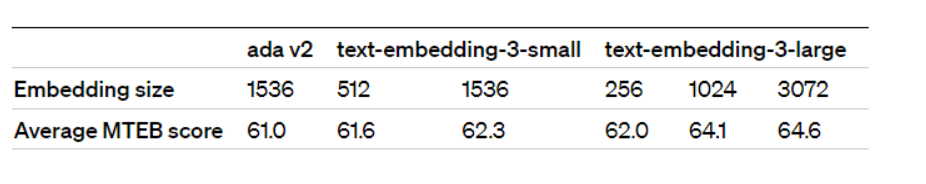

In [ ]:
from langchain_openai import OpenAIEmbeddings


embeddings = OpenAIEmbeddings(model="text-embedding-3-large",
                                          dimensions = 3072)# dimensions=256, 1024, 3072



print(embeddings)


client=<openai.resources.embeddings.Embeddings object at 0x7fde02438340> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x7fde40711210> model='text-embedding-3-large' dimensions=3072 deployment='text-embedding-ada-002' openai_api_version='' openai_api_base=None openai_api_type='' openai_proxy='' embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [ ]:
#doc_result = embeddings.embed_documents(pdf)

### Load Vectorstore(index) From Your Drive

In [ ]:
from langchain_chroma import Chroma

#index=Chroma.from_documents(documents=pdf_doc,
#                            embedding=embeddings,
#                            persist_directory="/content/drive/MyDrive/vectorstore") # persist_directory, saves in the directory

#retriever=index.as_retriever()

In [ ]:
loaded_index=Chroma(persist_directory="/content/drive/MyDrive/vectorstore",
                    embedding_function=embeddings)

In [ ]:
load_retriver=loaded_index.as_retriever(search_kwargs={"k": 5})

### Retrival the First 5 Chunks That Are Most Similar to The User Query from The Document

In [ ]:
load_retriver = loaded_index.as_retriever(search_kwargs = {'k': 5})

In [ ]:
retrieved_docs = load_retriver.invoke('What is BERT?')

In [ ]:
retrieved_docs

[Document(metadata={'page': 0, 'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf'}, page_content='to create state-of-the-art models for a wide\r\nrange of tasks, such as question answering and\r\nlanguage inference, without substantial task\x02specific architecture modifications.\r\nBERT is conceptually simple and empirically\r\npowerful. It obtains new state-of-the-art re\x02sults on eleven natural language processing\r\ntasks, including pushing the GLUE score to\r\n80.5% (7.7% point absolute improvement),\r\nMultiNLI accuracy to 86.7% (4.6% absolute\r\nimprovement), SQuAD v1.1 question answer\x02ing Test F1 to 93.2 (1.5 point absolute im\x02provement) and SQuAD v2.0 Test F1 to 83.1\r\n(5.1 point absolute improvement).\r\n1 Introduction\r\nLanguage model pre-training has been shown to\r\nbe effective for improving many natural language\r\nprocessing tasks (Dai and Le, 2015; Peters et al.,\r\n2018a; Radford et al., 2018; Howard and Ruder,\r\n2018). These include sentence-level

### Generating an Answer Based on The Similar Chunks

In [ ]:
from langchain.prompts import PromptTemplate

template="""Use the following pieces of context to answer the user's question of {question}.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
{context}"""

prompt_template = PromptTemplate(
    input_variables =['question','context'],
    template = template
)

### Pipeline For RAG (If you want, you can use the gemini-1.5-pro model)

In [ ]:
our_query = "What is BERT?"

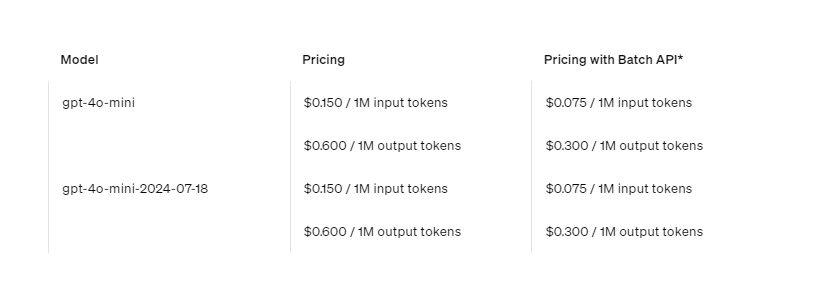

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

llm=ChatOpenAI(model_name="gpt-4o-mini",
               temperature=0,
               top_p=1)

chain = prompt_template | llm | StrOutputParser()

output= chain.invoke({"question":our_query, "context":retrieved_docs}) # first four most similar texts are returned
output

'BERT, which stands for Bidirectional Encoder Representations from Transformers, is a language model that improves fine-tuning approaches for natural language processing tasks. It is designed to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without requiring significant modifications to the architecture for specific tasks. BERT uses a "masked language model" pre-training objective, allowing it to incorporate context from both directions, which is beneficial for tasks that require understanding the full context of a sentence. It has achieved new state-of-the-art results on several natural language processing benchmarks.'

In [ ]:
from IPython.display import Markdown

Markdown(output)

BERT, which stands for Bidirectional Encoder Representations from Transformers, is a language model that improves fine-tuning approaches for natural language processing tasks. It is designed to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without requiring significant modifications to the architecture for specific tasks. BERT uses a "masked language model" pre-training objective, allowing it to incorporate context from both directions, which is beneficial for tasks that require understanding the full context of a sentence. It has achieved new state-of-the-art results on several natural language processing benchmarks.

##**Retrieval**

In [ ]:
def retrieve_query(query,k=5):
    load_retriever=loaded_index.as_retriever(search_kwargs={"k": k}) #loaded_index
    return load_retriever.invoke(query)

In [ ]:
our_query = "What is BERT?"

doc_search=retrieve_query(our_query, k=5) # first two most similar texts are returned
doc_search

[Document(metadata={'page': 0, 'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf'}, page_content='to create state-of-the-art models for a wide\r\nrange of tasks, such as question answering and\r\nlanguage inference, without substantial task\x02specific architecture modifications.\r\nBERT is conceptually simple and empirically\r\npowerful. It obtains new state-of-the-art re\x02sults on eleven natural language processing\r\ntasks, including pushing the GLUE score to\r\n80.5% (7.7% point absolute improvement),\r\nMultiNLI accuracy to 86.7% (4.6% absolute\r\nimprovement), SQuAD v1.1 question answer\x02ing Test F1 to 93.2 (1.5 point absolute im\x02provement) and SQuAD v2.0 Test F1 to 83.1\r\n(5.1 point absolute improvement).\r\n1 Introduction\r\nLanguage model pre-training has been shown to\r\nbe effective for improving many natural language\r\nprocessing tasks (Dai and Le, 2015; Peters et al.,\r\n2018a; Radford et al., 2018; Howard and Ruder,\r\n2018). These include sentence-level

In [ ]:
def get_answers(query, k = 5):
    from langchain_openai import ChatOpenAI
    from langchain_core.output_parsers import StrOutputParser
    from langchain.prompts import PromptTemplate
    from IPython.display import Markdown

    doc_search=retrieve_query(query, k = k) # most similar texts are returned


    template="""Use the following pieces of context to answer the user's question of {question}.
    If you don't know the answer, just say that you don't know, don't try to make up an answer.
    ----------------
    {context}"""

    prompt_template = PromptTemplate(
    input_variables =['question','context'],
    template = template)


    llm=ChatOpenAI(model_name="gpt-4o-mini",
                  temperature=0,
                  top_p=1)

    chain = prompt_template | llm | StrOutputParser()

    output= chain.invoke({"question":query, "context":doc_search}) # first four most similar texts are returned
    return Markdown(output)

In [ ]:
our_query = "What are the key architectural components of BERT?"
answer = get_answers(our_query)
answer

The key architectural components of BERT include:

1. **Multi-layer Bidirectional Transformer Encoder**: BERT is based on a multi-layer bidirectional Transformer architecture, which allows it to consider context from both the left and right of a token simultaneously.

2. **Transformer Blocks**: The architecture consists of multiple layers of Transformer blocks, denoted as L.

3. **Hidden Size**: The hidden size of the model is denoted as H, which determines the dimensionality of the representations.

4. **Self-attention Heads**: The number of self-attention heads in the model is denoted as A, which allows the model to focus on different parts of the input sequence.

5. **Model Sizes**: BERT primarily reports results on two model sizes:
   - **BERTBASE**: 12 layers (L=12), hidden size of 768 (H=768), and 12 self-attention heads (A=12), totaling 110 million parameters.
   - **BERTLARGE**: 24 layers (L=24), hidden size of 1024 (H=1024), with a larger number of parameters.

These components contribute to BERT's ability to perform well across various natural language processing tasks with minimal differences between the pre-trained and downstream architectures.

In [ ]:
our_query = "What are the main contributions of the BERT model?"
answer = get_answers(our_query)
answer

The main contributions of the BERT model include:

1. **Bidirectional Pre-training**: BERT demonstrates the importance of bidirectional pre-training for language representations. Unlike previous models that used unidirectional language models, BERT employs masked language models to create deep bidirectional representations.

2. **State-of-the-Art Performance**: BERT achieves new state-of-the-art results on eleven natural language processing tasks, significantly improving scores on benchmarks such as GLUE, MultiNLI, and SQuAD.

3. **Effective Use of Pre-trained Representations**: The model shows that pre-trained representations can effectively reduce the need for substantial task-specific architecture modifications, making it easier to apply to a wide range of tasks like question answering and language inference.

4. **Masked Language Model and Next Sentence Prediction**: BERT utilizes a masked language model objective that allows the model to fuse left and right context, along with a next sentence prediction task that helps in jointly pre-training text-pair representations.

## Project 2: Generating PDF Document Summaries

In this project, you will explore various methods for creating summaries from the provided PDF document. You will experiment with different chaining functions offered by the Langchain library to achieve this.

### **Project Steps:**
- **1.PDF Document Upload and Chunking:** As in the first project, upload the PDF document and divide it into smaller chunks. Consider splitting it by half-page or page.

- **2.Summarization Techniques:**

  - **Summary of the First 5 Pages (Stuff Chain):** Utilize the load_summarize_chain function with the parameter chain_type="stuff" to generate a concise summary of the first 5 pages of the PDF document.

  - **Short Summary of the Entire Document (Map Reduce Chain):** Employ chain_type="map_reduce" and refine parameters to create a brief summary of the entire document. This method generates individual summaries for each chunk and then combines them into a final summary.

  - **Detailed Summary with Bullet Points (Map Reduce Chain):** Use chain_type="map_reduce" to generate a detailed summary with at least 1000 tokens. Provide the LLM with the prompt "Summarize with 1000 tokens" and set the max_token parameter to a value greater than 1000. Add a title to the summary and present key points using bullet points.

### Important Notes:

- Models like GPT-4 and Gemini Pro models might excel in generating summaries based on token count. Consider prioritizing these models.

- For comprehensive information on Langchain and LLMs, refer to their respective documentation.
Best of luck!

### Install Libraries

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

### Loading PDF Document

In [ ]:
pdf=read_doc('/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf')

/usr/local/lib/python3.10/dist-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


In [ ]:
pdf[0] #first page

Document(metadata={'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf', 'page': 0}, page_content='Proceedings of NAACL-HLT 2019, pages 4171–4186\r\nMinneapolis, Minnesota, June 2 - June 7, 2019. \rc 2019 Association for Computational Linguistics\r\n4171\r\nBERT: Pre-training of Deep Bidirectional Transformers for\r\nLanguage Understanding\r\nJacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova\r\nGoogle AI Language\r\n{jacobdevlin,mingweichang,kentonl,kristout}@google.com\r\nAbstract\r\nWe introduce a new language representa\x02tion model called BERT, which stands for\r\nBidirectional Encoder Representations from\r\nTransformers. Unlike recent language repre\x02sentation models (Peters et al., 2018a; Rad\x02ford et al., 2018), BERT is designed to pre\x02train deep bidirectional representations from\r\nunlabeled text by jointly conditioning on both\r\nleft and right context in all layers. As a re\x02sult, the pre-trained BERT model can be fine\x02tuned with just one additio

### Summarizing the First 5 Pages of The Document With Chain_Type of The 'stuff'

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import load_summarize_chain
from langchain.llms import OpenAI

In [ ]:
pdf[:5] # first five page

[Document(metadata={'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf', 'page': 0}, page_content='Proceedings of NAACL-HLT 2019, pages 4171–4186\r\nMinneapolis, Minnesota, June 2 - June 7, 2019. \rc 2019 Association for Computational Linguistics\r\n4171\r\nBERT: Pre-training of Deep Bidirectional Transformers for\r\nLanguage Understanding\r\nJacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova\r\nGoogle AI Language\r\n{jacobdevlin,mingweichang,kentonl,kristout}@google.com\r\nAbstract\r\nWe introduce a new language representa\x02tion model called BERT, which stands for\r\nBidirectional Encoder Representations from\r\nTransformers. Unlike recent language repre\x02sentation models (Peters et al., 2018a; Rad\x02ford et al., 2018), BERT is designed to pre\x02train deep bidirectional representations from\r\nunlabeled text by jointly conditioning on both\r\nleft and right context in all layers. As a re\x02sult, the pre-trained BERT model can be fine\x02tuned with just one additi

### Document Splitter

In [ ]:
pdf_doc=chunk_data(docs=pdf)
len(pdf_doc)

84

In [ ]:
#Belgeyi parçalara ayırın
#text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
#docs = text_splitter.split_documents(pdf)

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain

llm = ChatOpenAI(temperature=0,
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

In [ ]:
chain = load_summarize_chain(
    llm,
    chain_type='stuff'
)
output_summary = chain.invoke(pdf_doc[0:5])['output_text']

In [ ]:
from IPython.display import Markdown
Markdown(output_summary)

The paper introduces BERT (Bidirectional Encoder Representations from Transformers), a novel language representation model developed by Google AI Language. Unlike previous models that use unidirectional context, BERT pre-trains deep bidirectional representations from unlabeled text, allowing it to consider both left and right context in all layers. This design enables BERT to be fine-tuned with minimal additional architecture for various natural language processing tasks, achieving state-of-the-art results on eleven benchmarks, including significant improvements in GLUE, MultiNLI, and SQuAD. BERT employs a masked language model pre-training objective, enhancing its effectiveness for both sentence-level and token-level tasks.

### Make A Brief Summary of The Entire Document With Chain_Types of "map_reduce" and "refine"

####Chain_Type : Map_reduce

In [ ]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

llm = ChatOpenAI(temperature=0,
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
chunks = text_splitter.split_documents(pdf)

In [ ]:
len(chunks)

16

In [ ]:
chunks[0]

Document(metadata={'source': '/content/drive/MyDrive/Rag Chatbot/N19-1423.pdf', 'page': 0}, page_content='Proceedings of NAACL-HLT 2019, pages 4171–4186\r\nMinneapolis, Minnesota, June 2 - June 7, 2019. \rc 2019 Association for Computational Linguistics\r\n4171\r\nBERT: Pre-training of Deep Bidirectional Transformers for\r\nLanguage Understanding\r\nJacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova\r\nGoogle AI Language\r\n{jacobdevlin,mingweichang,kentonl,kristout}@google.com\r\nAbstract\r\nWe introduce a new language representa\x02tion model called BERT, which stands for\r\nBidirectional Encoder Representations from\r\nTransformers. Unlike recent language repre\x02sentation models (Peters et al., 2018a; Rad\x02ford et al., 2018), BERT is designed to pre\x02train deep bidirectional representations from\r\nunlabeled text by jointly conditioning on both\r\nleft and right context in all layers. As a re\x02sult, the pre-trained BERT model can be fine\x02tuned with just one additio

In [ ]:
%%time
chain = load_summarize_chain(llm,
                             chain_type="map_reduce")


output_summary = chain.invoke(chunks)["output_text"]
Markdown(output_summary)

CPU times: user 2.3 s, sys: 279 ms, total: 2.57 s
Wall time: 5min 37s


The paper presents BERT (Bidirectional Encoder Representations from Transformers), a groundbreaking language representation model developed by Google AI Language. Unlike previous unidirectional models, BERT utilizes deep bidirectional representations, allowing it to consider context from both sides in all layers. It is pre-trained using a masked language model (MLM) and next sentence prediction (NSP) tasks, which significantly enhance its performance across various natural language processing (NLP) tasks. BERT achieves state-of-the-art results on eleven benchmarks, including GLUE and SQuAD, with notable improvements over prior models. The architecture is designed for easy fine-tuning with minimal additional adjustments, and it employs a unique input representation that accommodates both single and paired sentences. The study highlights the importance of extensive pre-training and the impact of model size on performance, demonstrating that larger models yield better results even with limited task data. The paper also reviews the evolution of language representation models and provides insights into hyperparameter tuning and the effectiveness of different pre-training strategies. Overall, BERT represents a significant advancement in NLP, showcasing the benefits of bidirectional context and robust pre-training methodologies.

####Chain_Type : Refine

In [ ]:
%%time
chain = load_summarize_chain(llm,
                             chain_type="refine")

output_summary = chain.invoke(chunks)["output_text"]

CPU times: user 1.57 s, sys: 257 ms, total: 1.83 s
Wall time: 5min 28s


In [ ]:
chain

RefineDocumentsChain(initial_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fddfe6f8b80>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fddfe6fb310>, root_client=<openai.OpenAI object at 0x7fddfe6f9780>, root_async_client=<openai.AsyncOpenAI object at 0x7fddfe6f9120>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), refine_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['existing_answer', 'text'], template="Your job is to produce a final summary.\nWe have provided an existing summary up to a certain point: {existing_answer}\nWe have the opportunity to refine the existing summary (only if needed) with some more context below.\n------------\n{text}\n------------\nGiven the new context, re

In [ ]:
Markdown(output_summary)

The original summary is comprehensive and effectively captures the key contributions and findings of the paper on BERT (Bidirectional Encoder Representations from Transformers). The additional context provided does not introduce new insights or significant details that would enhance the existing summary. Therefore, the original summary remains appropriate and does not require refinement. 

Here is the original summary:

The paper introduces BERT (Bidirectional Encoder Representations from Transformers), a novel language representation model developed by Google AI Language. Unlike previous models that use unidirectional context, BERT pre-trains deep bidirectional representations from unlabeled text, allowing it to consider both left and right contexts simultaneously. This approach enables BERT to achieve state-of-the-art results on various natural language processing tasks, including question answering and language inference, with minimal task-specific modifications. BERT employs a masked language model (MLM) pre-training objective, which enhances its effectiveness by allowing the model to learn word representations based on their context. Additionally, BERT incorporates a "next sentence prediction" (NSP) task that jointly pre-trains text-pair representations.

To handle a variety of downstream tasks, BERT's input representation can unambiguously represent both single sentences and pairs of sentences in one token sequence. It uses WordPiece embeddings with a 30,000 token vocabulary, where the first token of every sequence is a special classification token ([CLS]). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks. Sentence pairs are packed together into a single sequence, differentiated by a special token ([SEP]) and learned embeddings indicating sentence membership. The input embeddings are the sum of token embeddings, segment embeddings, and position embeddings.

The contributions of the paper include demonstrating the importance of bidirectional pre-training for language representations, showing that pre-trained representations reduce the need for heavily-engineered task-specific architectures, and advancing the state of the art for eleven NLP tasks. BERT outperforms many task-specific architectures and achieves significant improvements in benchmark scores, such as an 80.5% GLUE score and high accuracy on SQuAD datasets. The model architecture is based on a multi-layer bidirectional Transformer encoder, with two primary sizes: BERTBASE (110M parameters) and BERTLARGE (340M parameters). Fine-tuning BERT for specific tasks is straightforward and can be done efficiently, with results replicable in a short time on standard hardware.

In the GLUE benchmark, BERTBASE and BERTLARGE achieve substantial improvements over previous state-of-the-art models, with BERTLARGE obtaining an average accuracy of 82.1%, surpassing OpenAI GPT by 7.0%. BERT also excels in the SQuAD v1.1 dataset, outperforming top leaderboard systems by significant margins, with BERTLARGE achieving an F1 score of 90.9 and an exact match (EM) score of 84.1. In SQuAD v2.0, BERTLARGE continues to demonstrate strong performance, achieving an F1 score of 83.1. The model also excels in the SWAG dataset, outperforming previous systems by a significant margin.

Ablation studies reveal the importance of the NSP task, showing that removing it significantly degrades performance on tasks like QNLI, MNLI, and SQuAD. Additionally, the paper highlights that larger model sizes lead to improved accuracy across various tasks, demonstrating that scaling to extreme model sizes can yield substantial improvements even on smaller datasets. The paper also discusses the effectiveness of both fine-tuning and feature-based approaches with BERT, particularly in tasks like Named Entity Recognition (NER), where fixed features extracted from the pre-trained model can be used effectively. The code and pre-trained models are available at https://github.com/google-research/bert.

### Generate A Detailed Summary of The Entire Document With At Least 1000 Tokens. Also, Add A Title To The Summary And Present Key Points Using Bullet Points With Chain_Type of "map_reduce".

####Map Reduce With Custom Prompts

In [ ]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce'
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fddfe6f8b80>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fddfe6fb310>, root_client=<openai.OpenAI object at 0x7fddfe6f9780>, root_async_client=<openai.AsyncOpenAI object at 0x7fddfe6f9120>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fddfe6f8b80>, async_client=<openai.resources.chat.completions.As

In [ ]:
# prompt for every chunk
from langchain import PromptTemplate

# Map prompt (her parça için kullanılacak prompt)
chunks_prompt = """
Please summarize the following text:
{text}
"""
map_prompt_template = PromptTemplate(input_variables=['text'], template=chunks_prompt)

In [ ]:
# Combine prompt (bütün parçalar birleştirildiğinde kullanılacak prompt)
final_combine_prompt = """
Summarize the text below with at least 1000 tokens. Provide a title and key points using bullet points:
{text}
"""
final_combine_prompt_template = PromptTemplate(input_variables=['text'], template=final_combine_prompt)


In [ ]:
# 3. Map-Reduce zinciri oluşturma
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce',
    map_prompt=map_prompt_template,
    combine_prompt=final_combine_prompt_template
)

In [ ]:
output_summary = chain.invoke(chunks)["output_text"]
output_summary

"# Title: Advancements in Language Representation: An In-Depth Overview of BERT\n\n## Key Points:\n\n- **Introduction to BERT**: \n  - BERT, which stands for Bidirectional Encoder Representations from Transformers, is a groundbreaking language representation model developed by Google AI Language.\n  - It is designed to pre-train deep bidirectional representations from unlabeled text, taking into account both left and right context, which enhances its understanding of language.\n\n- **Pre-training and Fine-tuning**:\n  - The architecture of BERT allows for efficient fine-tuning with minimal modifications for a variety of natural language processing (NLP) tasks.\n  - The model operates in two main phases: pre-training on large amounts of unlabeled data and fine-tuning on labeled datasets tailored for specific tasks.\n\n- **Bidirectional Pre-training**:\n  - BERT utilizes a masked language model (MLM) pre-training objective, which improves contextual understanding by randomly masking toke

In [ ]:
from IPython.display import Markdown

Markdown(output_summary)

# Title: Advancements in Language Representation: An In-Depth Overview of BERT

## Key Points:

- **Introduction to BERT**: 
  - BERT, which stands for Bidirectional Encoder Representations from Transformers, is a groundbreaking language representation model developed by Google AI Language.
  - It is designed to pre-train deep bidirectional representations from unlabeled text, taking into account both left and right context, which enhances its understanding of language.

- **Pre-training and Fine-tuning**:
  - The architecture of BERT allows for efficient fine-tuning with minimal modifications for a variety of natural language processing (NLP) tasks.
  - The model operates in two main phases: pre-training on large amounts of unlabeled data and fine-tuning on labeled datasets tailored for specific tasks.

- **Bidirectional Pre-training**:
  - BERT utilizes a masked language model (MLM) pre-training objective, which improves contextual understanding by randomly masking tokens in the input and requiring the model to predict these masked tokens.
  - This bidirectional approach contrasts with earlier unidirectional models, which limited their effectiveness in certain NLP tasks.

- **Reduction of Task-Specific Architectures**:
  - BERT significantly reduces the necessity for complex, task-specific architectures, achieving state-of-the-art performance across a range of NLP tasks through its fine-tuning capabilities.
  - Its unified architecture allows for application across different tasks with minimal differences between the pre-training and fine-tuning stages.

- **Performance Improvements**:
  - BERT has set new benchmarks, achieving state-of-the-art results across eleven different benchmarks, including notable improvements in GLUE, MultiNLI, and SQuAD tasks.
  - The model's code and pre-trained versions are publicly accessible, fostering further research and practical applications.

- **Related Work**:
  - The paper reviews the evolution of unsupervised feature-based and fine-tuning approaches for language representation, tracing the development from traditional word embeddings to more sophisticated contextual representations.
  - Previous models such as ELMo and OpenAI GPT have laid the groundwork for the innovations introduced by BERT.

- **Input Representation**:
  - BERT processes both single sentences and pairs of sentences using a unified token sequence, employing WordPiece embeddings with a vocabulary of 30,000 tokens.
  - Each input sequence begins with a special classification token ([CLS]) and uses a separator token ([SEP]) for distinguishing sentence pairs.

- **Pre-training Tasks**:
  - BERT is pre-trained using two unsupervised tasks:
    1. **Masked Language Model (MLM)**: This task involves randomly masking a percentage of input tokens and predicting them, which allows for a deep bidirectional representation.
    2. **Next Sentence Prediction (NSP)**: This task trains the model to understand the relationships between sentences by predicting whether a given sentence logically follows another.

- **Fine-tuning Process**:
  - Fine-tuning BERT for various downstream tasks is efficient due to its self-attention mechanism, which enables it to handle both single texts and text pairs seamlessly.
  - The fine-tuning process involves adapting the model to specific tasks by modifying the input and output layers.

- **Benchmark Performance**:
  - BERT models have significantly outperformed previous state-of-the-art systems on the GLUE benchmark and SQuAD tasks.
  - The BERTLARGE variant, in particular, has achieved notable accuracy improvements, especially in tasks with limited training data.

- **SQuAD Results**:
  - BERTLARGE has achieved an F1 score of 87.4 on the SQuAD 1.1 development set and 93.2 on the test set, surpassing other models.
  - For SQuAD 2.0, BERTLARGE achieved an F1 score of 83.1, demonstrating significant improvements over prior systems.

- **SWAG Results**:
  - BERTLARGE has excelled in the SWAG dataset, achieving an accuracy of 86.3, outperforming both ESIM+ELMo and OpenAI GPT models.

- **Ablation Studies**:
  - Ongoing experiments are analyzing the importance of different components of the BERT model, focusing on the pre-training tasks and model sizes.
  - Removing the NSP task has been shown to significantly degrade performance on various tasks, underscoring the importance of bidirectionality.

- **Model Size Impact**:
  - Increasing the model size consistently leads to improved accuracy across various datasets, challenging previous assumptions regarding limitations on smaller datasets.

- **Feature-based vs. Fine-tuning Approaches**:
  - The text compares fine-tuning and feature-based approaches for the CoNLL-2003 Named Entity Recognition (NER) task, demonstrating BERT's effectiveness in both methodologies.

- **Conclusion**:
  - The findings emphasize the significance of rich, unsupervised pre-training in language understanding systems, suggesting that deep bidirectional architectures can effectively tackle a wide range of NLP tasks, even

In [ ]:
#ayni ciktiyi verdi asagidaki chatgpt kodu da

In [ ]:

# 2. PDF Belgesini Parçalayın
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = text_splitter.split_documents(pdf_doc)

# 3. Map Reduce Zinciri Kurun
llm = OpenAI(temperature=0)
chain = load_summarize_chain(llm, chain_type="map_reduce")

# 4. Ayrıntılı Özet Oluşturun
# Bu aşamada özeti 1000 token ile sınırlandıracak ve başlık ekleyeceksiniz
detailed_summary = chain.run(
    input_documents=chunks,
    prompts="Summarize with at least 1000 tokens. Provide a title and key points using bullet points.",
    max_tokens=1500  # En az 1000 token olacak şekilde ayarladık
)

# Başlık ve anahtar noktalar ekleyin
title = "Detailed Summary of the Document"
print(f"Title: {title}")
print(detailed_summary)

<ipython-input-60-579b5a30a2fe>:6: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  llm = OpenAI(temperature=0)
<ipython-input-60-579b5a30a2fe>:11: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  detailed_summary = chain.run(


Title: Detailed Summary of the Document
 The article discusses BERT, a new language representation model, and its use in natural language processing tasks. It compares BERT to previous models, describes its architecture and training process, and presents its performance on various benchmarks. The article also discusses the importance of model size and pre-training tasks in improving performance.


In [ ]:
from IPython.display import Markdown

Markdown(output_summary)

# Title: Advancements in Language Representation: An In-Depth Overview of BERT

## Key Points:

- **Introduction to BERT**: 
  - BERT, which stands for Bidirectional Encoder Representations from Transformers, is a groundbreaking language representation model developed by Google AI Language.
  - It is designed to pre-train deep bidirectional representations from unlabeled text, taking into account both left and right context, which enhances its understanding of language.

- **Pre-training and Fine-tuning**:
  - The architecture of BERT allows for efficient fine-tuning with minimal modifications for a variety of natural language processing (NLP) tasks.
  - The model operates in two main phases: pre-training on large amounts of unlabeled data and fine-tuning on labeled datasets tailored for specific tasks.

- **Bidirectional Pre-training**:
  - BERT utilizes a masked language model (MLM) pre-training objective, which improves contextual understanding by randomly masking tokens in the input and requiring the model to predict these masked tokens.
  - This bidirectional approach contrasts with earlier unidirectional models, which limited their effectiveness in certain NLP tasks.

- **Reduction of Task-Specific Architectures**:
  - BERT significantly reduces the necessity for complex, task-specific architectures, achieving state-of-the-art performance across a range of NLP tasks through its fine-tuning capabilities.
  - Its unified architecture allows for application across different tasks with minimal differences between the pre-training and fine-tuning stages.

- **Performance Improvements**:
  - BERT has set new benchmarks, achieving state-of-the-art results across eleven different benchmarks, including notable improvements in GLUE, MultiNLI, and SQuAD tasks.
  - The model's code and pre-trained versions are publicly accessible, fostering further research and practical applications.

- **Related Work**:
  - The paper reviews the evolution of unsupervised feature-based and fine-tuning approaches for language representation, tracing the development from traditional word embeddings to more sophisticated contextual representations.
  - Previous models such as ELMo and OpenAI GPT have laid the groundwork for the innovations introduced by BERT.

- **Input Representation**:
  - BERT processes both single sentences and pairs of sentences using a unified token sequence, employing WordPiece embeddings with a vocabulary of 30,000 tokens.
  - Each input sequence begins with a special classification token ([CLS]) and uses a separator token ([SEP]) for distinguishing sentence pairs.

- **Pre-training Tasks**:
  - BERT is pre-trained using two unsupervised tasks:
    1. **Masked Language Model (MLM)**: This task involves randomly masking a percentage of input tokens and predicting them, which allows for a deep bidirectional representation.
    2. **Next Sentence Prediction (NSP)**: This task trains the model to understand the relationships between sentences by predicting whether a given sentence logically follows another.

- **Fine-tuning Process**:
  - Fine-tuning BERT for various downstream tasks is efficient due to its self-attention mechanism, which enables it to handle both single texts and text pairs seamlessly.
  - The fine-tuning process involves adapting the model to specific tasks by modifying the input and output layers.

- **Benchmark Performance**:
  - BERT models have significantly outperformed previous state-of-the-art systems on the GLUE benchmark and SQuAD tasks.
  - The BERTLARGE variant, in particular, has achieved notable accuracy improvements, especially in tasks with limited training data.

- **SQuAD Results**:
  - BERTLARGE has achieved an F1 score of 87.4 on the SQuAD 1.1 development set and 93.2 on the test set, surpassing other models.
  - For SQuAD 2.0, BERTLARGE achieved an F1 score of 83.1, demonstrating significant improvements over prior systems.

- **SWAG Results**:
  - BERTLARGE has excelled in the SWAG dataset, achieving an accuracy of 86.3, outperforming both ESIM+ELMo and OpenAI GPT models.

- **Ablation Studies**:
  - Ongoing experiments are analyzing the importance of different components of the BERT model, focusing on the pre-training tasks and model sizes.
  - Removing the NSP task has been shown to significantly degrade performance on various tasks, underscoring the importance of bidirectionality.

- **Model Size Impact**:
  - Increasing the model size consistently leads to improved accuracy across various datasets, challenging previous assumptions regarding limitations on smaller datasets.

- **Feature-based vs. Fine-tuning Approaches**:
  - The text compares fine-tuning and feature-based approaches for the CoNLL-2003 Named Entity Recognition (NER) task, demonstrating BERT's effectiveness in both methodologies.

- **Conclusion**:
  - The findings emphasize the significance of rich, unsupervised pre-training in language understanding systems, suggesting that deep bidirectional architectures can effectively tackle a wide range of NLP tasks, even

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___